In [2]:
import pandas as pd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

## Data Frame Work

In [4]:
bus_df = pd.read_csv(r"C:\Users\bmmur\Recommendation Concentration\updated_yelp_business.csv")
review_df = pd.read_csv(r"C:\Users\bmmur\Recommendation Concentration\yelp_reviews.csv")
user_df = pd.read_csv(r"C:\Users\bmmur\Recommendation Concentration\yelp_user.csv")

In [5]:
user_df.head()

,user_id,review_count,yelping_since,average_stars,name
0,qVc8ODYU5SZjKXVBgXdI7w,585,2007-01-25 16:47:26,3.91,Walker
1,j14WgRoU_-2ZE1aw1dXrJg,4333,2009-01-25 04:35:42,3.74,Daniel
2,2WnXYQFK0hXEoTxPtV2zvg,665,2008-07-25 10:41:00,3.32,Steph
3,SZDeASXq7o05mMNLshsdIA,224,2005-11-29 04:38:33,4.27,Gwen
4,hA5lMy-EnncsH4JoR-hFGQ,79,2007-01-05 19:40:59,3.54,Karen


In [6]:
review_df.head()

,review_id,user_id,business_id,stars,date,text
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...


In [7]:
bus_df.head(20)

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,36.269593,-87.058943,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,Brentwood,MO,38.627695,-90.340465,2.5,13,1,"Sporting Goods, Fashion, Shoe Stores, Shopping..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,St. Petersburg,FL,27.766590,-82.732983,3.5,5,1,"Synagogues, Religious Organizations"
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,38.565165,-90.321087,3.0,19,0,"Pubs, Restaurants, Italian, Bars, American (Tr..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,36.208102,-86.768170,1.5,10,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."


In [8]:
# Create a Primary Category
bus_df['categories'] = bus_df['categories'].astype(str)
bus_df['primary_category'] = bus_df['categories'].apply(lambda x: x.split(',')[0].strip())

In [9]:
# Check if Review Data is Population or Sample
test_firm = ['--7PUidqRWpRSpXebiyxTg']
test_firm_check = review_df[review_df['business_id'].isin(test_firm)]
test_firm_check['business_id'].value_counts()

business_id
--7PUidqRWpRSpXebiyxTg    12
Name: count, dtype: int64

In [10]:
# Check Business_id for specific businesses
test_2 = ['ZORBAS II']
test_2_check = bus_df[bus_df['name'].isin(test_2)]

In [11]:
test_2_check.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,primary_category
85598,-d3GCAgDik9D-1YUM9w2lQ,ZORBAS II,Tarpon Springs,FL,28.140059,-82.756628,3.5,5,0,"Restaurants, Venues & Event Spaces, Greek, Par...",Restaurants


# Understanding the First and Last Review Dates

In [13]:
descending_review_df = review_df.sort_values(by='date', ascending=False)
ascending_review_df = review_df.sort_values(by='date', ascending=True)

In [14]:
descending_review_df.head()

,review_id,user_id,business_id,stars,date,text
4863327,6BXQO_LAmMolJ5BYieGDsA,IH0ToaZ8hJXO2pVieN7dpQ,VItkA7pL82rCZdxHH8vBGA,5.0,2022-01-19 19:48:45,This was amongst my favorite Yelp Elite events...
5476035,gUkdqUCMJCJ38HVlLZxlgg,i1PMqye40QWNkJ0MYGHuzg,J0joPXxmN-_9Lzafspqdbw,5.0,2022-01-19 19:48:25,Love love love this place! Great food and alwa...
6251618,3wqrZowVYwSPEh8p5nLn1g,3TQKP7KlNRdrI2gOkG7slg,jVg-KTXEFIeAq47DTp4Hrw,5.0,2022-01-19 19:48:19,Jerry did an excellent job! My car is running ...
2710116,L0KaPI67DcTN4wwqfz6A3w,2Mb0st9WVyccaz6sKNLHWw,M88FFZZ2o_7QKpCFA_8RtA,5.0,2022-01-19 19:48:16,I LOVE Subaru of Cherry Hill. I have bought n...
4878781,11yPqFYtkACY7TWKc5MNzA,lmiiFd9KC15fs4xtEoXRvw,XDMno4l95AXgYOd0yDtHZA,5.0,2022-01-19 19:48:13,Such yummy food and great customer service! I ...


In [15]:
ascending_review_df.head()

,review_id,user_id,business_id,stars,date,text
4179799,IykJMMZgbNcUndwf1q6ieg,3zBJUlWtPNoZ0uN83ODbyg,2bXm0SynOfxDzfrdrCyXqg,4.0,2005-02-16 03:23:22,It's not chicago style pizza but it is still a...
6295220,-O5ng1XLox6uEr4uIZ8u5A,3zBJUlWtPNoZ0uN83ODbyg,3g6XqkBikTTbZmTukbeGnw,4.0,2005-02-16 03:29:39,Great service. The people really want to help...
4887456,g80vzN72iU03Wh0fSpq41g,3zBJUlWtPNoZ0uN83ODbyg,PP3BBaVxZLcJU54uP_wL6Q,5.0,2005-02-16 04:06:26,These guys really are the king of cheese steak...
1423159,7Dcrt0Oz0hikA8obGhadrQ,XCsZ3hWa_6oP1WkWvK7pmg,U3grYFIeu6RgAAQgdriHww,5.0,2005-03-01 16:57:17,Words cannot describe how much I miss this pla...
4884223,WC9q5vhQlQkLK05kEs-vYQ,XCsZ3hWa_6oP1WkWvK7pmg,Aes-0Q_guDeYewMapFs_vg,2.0,2005-03-01 16:59:37,Food is decent but is a complete tourist trap....


In [16]:
bus_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,primary_category
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",Doctors
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma...",Shipping Centers
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G...",Department Stores
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Restaurants
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food",Brewpubs


In [17]:
bus_df_selected = bus_df[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
merged_df = pd.merge(review_df, bus_df_selected, on='business_id', how='left')

In [18]:
review_df['date'] = pd.to_datetime(review_df['date'])

In [19]:
merged_df.head()

,review_id,user_id,business_id,stars,date,text,name,city,state,categories,primary_category,is_open
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is...",Turning Point of North Wales,North Wales,PA,"Restaurants, Breakfast & Brunch, Food, Juice B...",Restaurants,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...,Body Cycle Spinning Studio,Philadelphia,PA,"Active Life, Cycling Classes, Trainers, Gyms, ...",Active Life,0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...,Kettle Restaurant,Tucson,AZ,"Restaurants, Breakfast & Brunch",Restaurants,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo...",Zaika,Philadelphia,PA,"Halal, Pakistani, Restaurants, Indian",Halal,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...,Melt,New Orleans,LA,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",Sandwiches,0


## Basic Statistical Work

In [21]:
bus_df['stars'].mean()

3.5967235576603303

In [22]:
bus_df['stars'].median()

3.5

In [23]:
bus_df['review_count'].mean()

44.86656113232144

In [24]:
bus_df['review_count'].median()

15.0

In [25]:
bus_df.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [26]:
user_df.describe()

,review_count,average_stars
count,1.987897e+06,1.987897e+06
mean,2.339441e+01,3.630494e+00
std,8.256699e+01,1.183337e+00
min,0.000000e+00,1.000000e+00
25%,2.000000e+00,3.000000e+00
50%,5.000000e+00,3.880000e+00
75%,1.700000e+01,4.560000e+00
max,1.747300e+04,5.000000e+00


## Graphing Rating Distribution

In [28]:
dist_rate =bus_df['stars'].value_counts()
dist_rate=dist_rate.sort_index()

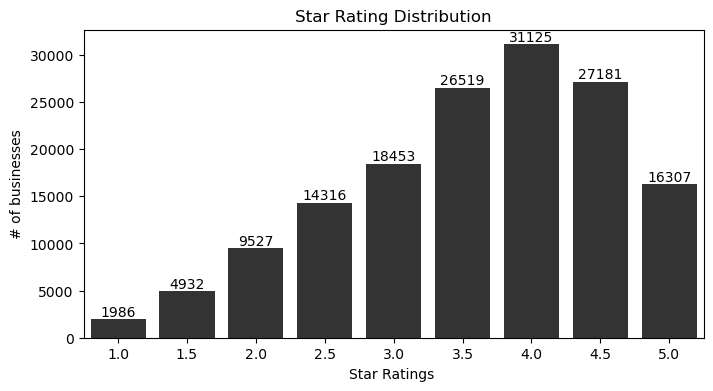

In [29]:
plt.figure(figsize=(8,4))
dist= sns.barplot(x=dist_rate.index, y=dist_rate.values, alpha=0.8, color='black')
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses')
plt.xlabel('Star Ratings ')

bins = dist.patches
labels = dist_rate.values
for bins, label in zip(bins, labels):
    height = bins.get_height()
    dist.text(bins.get_x() + bins.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig('star_rating_distribution.png')
plt.show()

In [30]:
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (bus_df["longitude"]>lon_min) &\
            (bus_df["longitude"]<lon_max) &\
            (bus_df["latitude"]>lat_min) &\
            (bus_df["latitude"]<lat_max)
#apply the selector to subset
NA_business=bus_df[idx_NA]

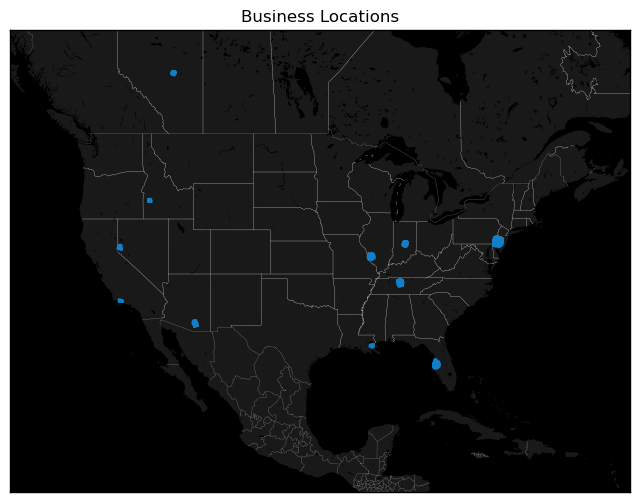

In [31]:
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000')
m2.drawmapboundary(fill_color='#000000')                
m2.drawcountries(linewidth=0.1, color="w")              
m2.drawstates(linewidth=0.1, color="w") 

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("Business Locations")
plt.savefig('Business Locations.png')

# Get a List of Good and Bad Cities

In [33]:
good_bus = bus_df[bus_df['stars'] >= 4]
bad_bus = bus_df[bus_df['stars'] <= 2]

# Seperating Data Into City/Surrounding Areas based on "good" or "bad" businesses

#### Tampa

In [36]:
tampa_businesses = bus_df[bus_df['state'] == 'FL']

In [37]:
tampa_good = tampa_businesses[tampa_businesses['stars'] >= 4]
tampa_bad = tampa_businesses[tampa_businesses['stars'] <= 2]

In [38]:
tampa_good_selected = tampa_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
tampa_bad_selected = tampa_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [39]:
tampa_good_reviews = pd.merge(review_df, tampa_good_selected, on='business_id', how='right')
tampa_bad_reviews = pd.merge(review_df, tampa_bad_selected, on='business_id', how='right')

#### Philadelphia

In [41]:
philly_states = ['PA', 'NJ', 'DE']
philly_businesses = bus_df[bus_df['state'].isin(philly_states)]

In [42]:
philly_good = philly_businesses[philly_businesses['stars'] >= 4]
philly_bad = philly_businesses[philly_businesses['stars'] <= 2]

In [43]:
philly_good_selected = philly_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
philly_bad_selected = philly_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [44]:
philly_good_reviews = pd.merge(review_df, philly_good_selected, on='business_id', how='right')
philly_bad_reviews = pd.merge(review_df, philly_bad_selected, on='business_id', how='right')

#### Tucson

In [46]:
tucson_businesses = bus_df[bus_df['state'] == 'AZ']

In [47]:
tucson_good = tucson_businesses[tucson_businesses['stars'] >= 4]
tucson_bad = tucson_businesses[tucson_businesses['stars'] <= 2]

In [48]:
tucson_good_selected = tucson_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
tucson_bad_selected = tucson_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [49]:
tucson_good_reviews = pd.merge(review_df, tucson_good_selected, on='business_id', how='right')
tucson_bad_reviews = pd.merge(review_df, tucson_bad_selected, on='business_id', how='right')

#### Nashville

In [51]:
nashville_businesses = bus_df[bus_df['state'] == 'TN']

In [52]:
nashville_good = nashville_businesses[nashville_businesses['stars'] >= 4]
nashville_bad = nashville_businesses[nashville_businesses['stars'] <= 2]

In [53]:
nashville_good_selected = nashville_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
nashville_bad_selected = nashville_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [54]:
nashville_good_reviews = pd.merge(review_df, nashville_good_selected, on='business_id', how='right')
nashville_bad_reviews = pd.merge(review_df, nashville_bad_selected, on='business_id', how='right')

#### Boise

In [56]:
boise_businesses = bus_df[bus_df['state'] == 'ID']

In [57]:
boise_good = boise_businesses[boise_businesses['stars'] >= 4]
boise_bad = boise_businesses[boise_businesses['stars'] <= 2]

In [58]:
boise_good_selected = boise_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
boise_bad_selected = boise_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [59]:
boise_good_reviews = pd.merge(review_df, boise_good_selected, on='business_id', how='right')
boise_bad_reviews = pd.merge(review_df, boise_bad_selected, on='business_id', how='right')

#### Indianapolis

In [61]:
indy_businesses = bus_df[bus_df['state'] == 'IN']

In [62]:
indy_good = indy_businesses[indy_businesses['stars'] >= 4]
indy_bad = indy_businesses[indy_businesses['stars'] <= 2]

In [63]:
indy_good_selected = indy_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
indy_bad_selected = indy_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [64]:
indy_good_reviews = pd.merge(review_df, indy_good_selected, on='business_id', how='right')
indy_bad_reviews = pd.merge(review_df, indy_bad_selected, on='business_id', how='right')

#### New Orleans

In [66]:
newor_businesses = bus_df[bus_df['state'] == 'LA']

In [67]:
newor_good = newor_businesses[newor_businesses['stars'] >= 4]
newor_bad = newor_businesses[newor_businesses['stars'] <= 2]

In [68]:
newor_good_selected = newor_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
newor_bad_selected = newor_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [69]:
newor_good_reviews = pd.merge(review_df, newor_good_selected, on='business_id', how='right')
newor_bad_reviews = pd.merge(review_df, newor_bad_selected, on='business_id', how='right')

#### Edmonton

In [71]:
edmonton_businesses = bus_df[bus_df['state'] == 'AB']

In [72]:
edmonton_good = edmonton_businesses[edmonton_businesses['stars'] >= 4]
edmonton_bad = edmonton_businesses[edmonton_businesses['stars'] <= 2]

In [73]:
edmonton_good_selected = edmonton_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
edmonton_bad_selected = edmonton_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [74]:
edmonton_good_reviews = pd.merge(review_df, edmonton_good_selected, on='business_id', how='right')
edmonton_bad_reviews = pd.merge(review_df, edmonton_bad_selected, on='business_id', how='right')

#### Saint Louis

In [76]:
stlouis_states = ['MO', 'IL']
stlouis_businesses = bus_df[bus_df['state'].isin(stlouis_states)]

In [77]:
stlouis_good = stlouis_businesses[stlouis_businesses['stars'] >= 4]
stlouis_bad = stlouis_businesses[stlouis_businesses['stars'] <= 2]

In [78]:
stlouis_good_selected = stlouis_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
stlouis_bad_selected = stlouis_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [79]:
stlouis_good_reviews = pd.merge(review_df, stlouis_good_selected, on='business_id', how='right')
stlouis_bad_reviews = pd.merge(review_df, stlouis_bad_selected, on='business_id', how='right')

#### Reno

In [81]:
reno_businesses = bus_df[bus_df['state'] == 'NV']

In [82]:
reno_good = reno_businesses[reno_businesses['stars'] >= 4]
reno_bad = reno_businesses[reno_businesses['stars'] <= 2]

In [83]:
reno_good_selected = reno_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
reno_bad_selected = reno_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [84]:
reno_good_reviews = pd.merge(review_df, reno_good_selected, on='business_id', how='right')
reno_bad_reviews = pd.merge(review_df, reno_bad_selected, on='business_id', how='right')

#### Santa Barbara

In [86]:
santabarb_businesses = bus_df[bus_df['state'] == 'CA']

In [87]:
santabarb_good = santabarb_businesses[santabarb_businesses['stars'] >= 4]
santabarb_bad = santabarb_businesses[santabarb_businesses['stars'] <= 2]

In [88]:
santabarb_good_selected = santabarb_good[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]
santabarb_bad_selected = santabarb_bad[['business_id', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']]

In [89]:
santabarb_good_reviews = pd.merge(review_df, santabarb_good_selected, on='business_id', how='right')
santabarb_bad_reviews = pd.merge(review_df, santabarb_bad_selected, on='business_id', how='right')

In [90]:
file_path = r"C:\Users\bmmur\Recommendation Concentration\santabarb_good_reviews.csv"
santabarb_good_reviews.to_csv(file_path, index=False)

# Seperating into Business Categories (using primary category, based on assumption the first is the main)

In [107]:
category_counts = santabarb_good_reviews['primary_category'].value_counts()
max_categories = category_counts[category_counts >= 5000]
print(max_categories)

primary_category
Restaurants                  40404
Food                         13784
Seafood                       8884
Mexican                       8625
American (New)                7407
Breakfast & Brunch            5689
Event Planning & Services     5660
American (Traditional)        5515
Bars                          5301
Nightlife                     5209
Beauty & Spas                 5087
Name: count, dtype: int64


In [109]:
second_categories = category_counts[(category_counts > 1000) & (category_counts <= 5000)]
print(second_categories)

primary_category
Cocktail Bars                4744
Coffee & Tea                 3767
Shopping                     2797
Salad                        2755
Delis                        2738
Hotels & Travel              2652
Live/Raw Food                2444
Active Life                  2428
Pizza                        2416
Automotive                   2280
Local Services               2277
Cafes                        2272
Sandwiches                   2222
Health & Medical             2105
Ice Cream & Frozen Yogurt    2015
Garage Door Services         1892
Home Services                1831
Arts & Entertainment         1797
Steakhouses                  1703
Burgers                      1598
Bakeries                     1492
Specialty Food               1459
Diners                       1401
Korean                       1319
Juice Bars & Smoothies       1272
Caterers                     1234
Tours                        1220
Nail Salons                  1218
Wine Tasting Room            11

In [111]:
third_categories = category_counts[(category_counts > 500) & (category_counts <= 1000)]
print(third_categories)

primary_category
Massage                      970
Beer                         893
Japanese                     881
Comfort Food                 868
Wine Bars                    867
Wineries                     827
French                       825
Breweries                    820
Ramen                        814
Indian                       797
Thai                         793
Gluten-Free                  756
Professional Services        737
Pets                         715
Vegetarian                   714
Cosmetics & Beauty Supply    706
Zoos                         701
Tuscan                       694
Health Markets               693
Tapas Bars                   675
Venues & Event Spaces        664
Beer Bar                     648
Cajun/Creole                 639
Parks                        627
Auto Parts & Supplies        616
Wedding Planning             613
Education                    597
Fast Food                    577
Local Flavor                 566
Chinese                   

In [113]:
fourth_categories = category_counts[(category_counts > 250) & (category_counts <= 500)]
print(fourth_categories)

primary_category
Tacos                           500
Pubs                            498
Hair Removal                    485
Doctors                         456
Jewelry                         452
Farmers Market                  449
Accessories                     436
Grocery                         419
Pet Services                    414
Sushi Bars                      403
Limos                           396
Makeup Artists                  396
Public Services & Government    395
Donuts                          391
Churches                        383
Flowers & Gifts                 371
Acupuncture                     367
Barbers                         365
Fitness & Instruction           363
General Dentistry               355
Car Dealers                     347
Laundry Services                344
Mediterranean                   343
Books                           315
Waxing                          311
Asian Fusion                    299
Gyms                            291
Auto Glass 

In [115]:
fourth_categories = category_counts[(category_counts > 150) & (category_counts <= 250)]
print(fourth_categories)

primary_category
Men's Hair Salons       247
Plumbing                244
Coffee Roasteries       243
Eyelash Service         242
Photographers           241
Piercing                234
Smog Check Stations     233
Cosmetic Dentists       232
Men's Clothing          229
Real Estate Agents      220
Car Wash                219
Wheel & Rim Repair      215
Caribbean               214
Massage Therapy         214
Soul Food               214
Challenge Courses       206
Sports Bars             205
Transportation          202
Chiropractors           201
Patisserie/Cake Shop    200
Desserts                199
Pet Sitting             197
Music Venues            195
Greek                   195
Paddleboarding          194
Auto Detailing          194
Eyewear & Opticians     191
Pop-Up Restaurants      191
Whale Watching Tours    190
Security Systems        189
Food Trucks             185
Body Shops              185
Real Estate             184
DJs                     182
Travel Services         180
Tob

In [117]:
fifth_categories = category_counts[(category_counts > 100) & (category_counts <= 150)]
print(fifth_categories)

primary_category
Szechuan                            150
Hair Stylists                       143
Chicken Shop                        143
Children's Museums                  142
Tex-Mex                             141
Mobile Phone Repair                 140
Water Heater Installation/Repair    139
Used                                138
Women's Clothing                    136
Spiritual Shop                      136
Couriers & Delivery Services        135
Cuban                               134
Chicken Wings                       131
Bubble Tea                          130
Apartments                          129
Party Equipment Rentals             128
Florists                            126
Bikes                               125
Toy Stores                          121
Contractors                         120
Surfing                             120
Oral Surgeons                       119
Themed Cafes                        119
Gelato                              118
Medical Centers        

In [119]:
sixth_categories = category_counts[(category_counts > 60) & (category_counts <= 100)]
print(sixth_categories)

primary_category
IV Hydration                        98
Botanical Gardens                   97
Keys & Locksmiths                   95
Hot Dogs                            95
Tanning                             94
Motorcycle Dealers                  94
Notaries                            93
Historical Tours                    91
Outdoor Gear                        90
Windshield Installation & Repair    89
Bridal                              89
Museums                             88
Printing Services                   88
Cooking Schools                     88
Electronics Repair                  87
Brazilian Jiu-jitsu                 87
Specialty Schools                   86
Landscaping                         84
Sports Medicine                     84
Property Management                 83
Whiskey Bars                        82
Shoe Shine                          82
Sewing & Alterations                78
Heating & Air Conditioning/HVAC     78
Mattresses                          78
Antiques

In [121]:
seventh_categories = category_counts[(category_counts > 40) & (category_counts <= 60)]
print(seventh_categories)

primary_category
Data Recovery                    60
Event Photography                60
Mortgage Brokers                 60
Junk Removal & Hauling           58
Nutritionists                    58
Banks & Credit Unions            58
Trainers                         57
Pet Training                     57
Photography Stores & Services    57
Carpeting                        55
Self Storage                     55
Pilates                          55
Hawaiian                         54
Cheese Shops                     54
Shipping Centers                 54
Life Insurance                   54
Pressure Washers                 53
Building Supplies                53
Criminal Defense Law             52
Tabletop Games                   52
Hair Loss Centers                52
Acai Bowls                       51
Cannabis Dispensaries            51
ATV Rentals/Tours                51
Drywall Installation & Repair    51
Cosmetic Surgeons                50
Watches                          50
Periodontis

In [123]:
restaurants = ['Restaurants', 'Food', 'Seafood', 'Mexican', 'American (New)', 'Breakfast & Brunch', 'American (Traditional)', 'Salad', 'Delis',
              'Live/Raw Food', 'Pizza', 'Sandwiches', 'Steakhouses', 'Burgers', 'Specalty Food', 'Diners', 'Korean', 'Modern European', 'Latin American',
              'Italian', 'Japanese', 'Comfort Food', 'French', 'Ramen', 'Indian', 'Thai', 'Gluten-Free', 'Vegetarian', 'Tuscan', 'Cajun/Creole',
              'Fast Food', 'Local Flavor', 'Chinese', 'Pakistani', 'Vegan', 'Tacos', 'Sushi Bars', 'Donuts', 'Mediterranean', 'Asian Fusion',
              'Tapas/Small Plates', 'Caribbean', 'Soul Food', 'Greek', 'Pop-Up Restaurants', 'Food Trucks', 'Food Stands', 'Barbeque', 'Arabic',
              'Szechuan', 'Chicken Shop', 'Tex-Mex', 'Cuban', 'Chicken Wings', 'German', 'Bagels']
santabarb_good_restaurants = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(restaurants)]

In [125]:
event = ['Event Planning & Services', 'Party & Event Planning', 'Tours', 'Zoos', 'Venues & Event Spaces', 'Wedding Planning', 'Beaches']
santabarb_good_eventplan = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(event)]

In [127]:
bars = ['Bars', 'Nightlife', 'Cocktail Bars', 'Wine Tasting Room', 'Beer', 'Wine Bars', 'Wineries', 'Breweries', 'Tapas Bars', 'Beer Bar', 'Wine Tours',
       'Pubs', 'Sports Bars', 'Dive Bars']
santabarb_good_bars = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(bars)]

In [129]:
beauty = ['Beauty & Spas', 'Nail Salons', 'Skin Care', 'Hair Salons', 'Massage', 'Cosmetics & Beauty Supply', 'Hair Removal', 'Makeup Artists',
         'Acupuncture', 'Barbers', 'Waxing', 'Men\'s Hair Salons', 'Eyelash Service', 'Piercing', 'Cosmetic Dentists', 'Day Spas', 'Hair Stylists', 
         'Hair Extensions']
santabarb_good_beauty = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(beauty)]

In [131]:
coffee = ['Coffee & Tea', 'Cafes', 'Lounges', 'Coffee Roasteries', 'Bubble Tea', 'Themed Cafes']
santabarb_good_coffee = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(coffee)]

In [133]:
shopping = ['Shopping', 'Home & Garden', 'Jewelry', 'Farmers Market', 'Accessories', 'Grocery', 'Flowers & Gifts', 'Books', 'Sporting Goods', 'Fashion',
           'Men\'s Clothing', 'Tobacco Shops', 'Pet Stores', 'Home Decor', 'Women\'s Clothing', 'Spiritual Shop', 'Apartments', 'Florists', 'Bikes',
           'Toy Stores', 'Discount Store']
santabarb_good_shopping = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(shopping)]

In [135]:
travel = ['Hotels & Travel', 'Hotels', 'Bed & Breakfast', 'Airports', 'Transportation', 'Travel Services']
santabarb_good_travel = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(travel)]

In [137]:
health = ['Health & Medical', 'Health Markets', 'Doctors', 'General Dentistry', 'Dentists', 'Chiropractors', 'Eyewear & Opticians', 'Oral Surgeons',
         'Medical Centers', 'Traditional Chinese Medicine']
santabarb_good_health = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(health)]

In [139]:
cars = ['Automotive', 'Auto Repair', 'Oil Change Stations', 'Auto Parts & Supplies', 'Car Dealers', 'Auto Glass Services', 'Smog Check Stations',
       'Wheel & Rim Repair', 'Auto Detailing', 'Body Shops', 'Tires', 'Transmission Repair']
santabarb_good_cars = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(cars)]

In [141]:
services = ['Local Services', 'Garage Door Services', 'Home Services', 'Caterers', 'Professional Services', 'Pets', 'Education', 'Boating',
            'Pet Services', 'Limos', 'Laundry Services', 'Appliances & Repair', 'Session Photography', 'Veterinarians', 'Plumbing', 'Photographers',
           'Real Estate Agents', 'Car Wash', 'Massage Therapy', 'Pet Sitting', 'Whale Watching Tours', 'Security Systems', 'Real Estate', 'DJs',
           'Carpet Cleaning', 'Flooring', 'Financial Services', 'Pet Groomers', 'Photo Booth Rentals', 'Home Cleaning', 'Handyman', 'Tree Services',
           'Mobile Phone Repair', 'Water Heater Installation/Repair', 'Couriers & Delivery Services', 'Party Equipment Rentals', 'Contractors',
           'Electricians', 'Officiants', 'Real Estate Services', 'Painters', 'Lawyers', 'Utilities']
santabarb_good_services = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(services)]

In [143]:
sweets = ['Ice Cream & Frozen Yogurt', 'Bakeries', 'Juice Bars & Smoothies', 'Patisserie/Cake Shop', 'Desserts', 'Gelato']
santabarb_good_sweets = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(sweets)]

In [145]:
arts = ['Arts & Entertainment', 'Performing Arts', 'Music Venues', 'Arts & Crafts', 'Children\'s Museums', 'Art Museums']
santabarb_good_arts = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(arts)]

In [147]:
govt = ['Public Services & Government', 'Courthouses']
santabarb_good_govt = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(govt)]

In [149]:
religion = ['Churches']
santabarb_good_religion = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(religion)]

In [151]:
active = ['Paddleboarding', 'Active Life', 'Parks', 'Fitness & Instruction', 'Gyms', 'Challenge Courses', 'Sports Clubs', 'Yoga', 'Surfing', 
          'Cardio Classes', 'Hiking']
santabarb_good_active = santabarb_good_reviews[santabarb_good_reviews['primary_category'].isin(active)]

# Seperate Businesses by Year on Good and Bad Review Count

In [154]:
merged_df.head()

,review_id,user_id,business_id,stars,date,text,name,city,state,categories,primary_category,is_open
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is...",Turning Point of North Wales,North Wales,PA,"Restaurants, Breakfast & Brunch, Food, Juice B...",Restaurants,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...,Body Cycle Spinning Studio,Philadelphia,PA,"Active Life, Cycling Classes, Trainers, Gyms, ...",Active Life,0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...,Kettle Restaurant,Tucson,AZ,"Restaurants, Breakfast & Brunch",Restaurants,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo...",Zaika,Philadelphia,PA,"Halal, Pakistani, Restaurants, Indian",Halal,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...,Melt,New Orleans,LA,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",Sandwiches,0


In [156]:
merged_df.sort_values(by = 'business_id')

,review_id,user_id,business_id,stars,date,text,name,city,state,categories,primary_category,is_open
1376413,gcTR_HEwhz7EnupVuG_bhw,WINRnvRO7iGEhrf9iwf25A,---kPU91CF4Lq2-WlRu9Lw,5.0,2021-11-13 23:16:59,Great atmosphere to match the incredible food ...,Frankie's Raw Bar,New Port Richey,FL,"Seafood, Restaurants, Latin American, Food, Fo...",Seafood,1
1340824,s7f2L3EESkKf-kNDSchpow,goqGoC76zemDagYvRa8GIA,---kPU91CF4Lq2-WlRu9Lw,4.0,2020-12-14 01:17:21,I love this place. Nice place for the girls to...,Frankie's Raw Bar,New Port Richey,FL,"Seafood, Restaurants, Latin American, Food, Fo...",Seafood,1
1372286,3SSlZgCoSsVT9BJe7x7TGw,5r_jlIQvSr7VG5YFbhU6nw,---kPU91CF4Lq2-WlRu9Lw,5.0,2021-04-27 15:36:40,"YUM! Such a cool place for lunch or dinner, lo...",Frankie's Raw Bar,New Port Richey,FL,"Seafood, Restaurants, Latin American, Food, Fo...",Seafood,1
1332799,gANpst_byMcYH6c6nqRcRg,jtPb5gfrvYixrC0axWjqlA,---kPU91CF4Lq2-WlRu9Lw,5.0,2021-10-17 02:02:58,What a fantastic casual seafood or BBQ local s...,Frankie's Raw Bar,New Port Richey,FL,"Seafood, Restaurants, Latin American, Food, Fo...",Seafood,1
1305649,7dFBRid1QdCCr2PNsfD_lw,w2SrX4cPZqykJ5P7UwABng,---kPU91CF4Lq2-WlRu9Lw,5.0,2020-09-26 20:42:25,Finale a local Fresh seafood place to go to. H...,Frankie's Raw Bar,New Port Richey,FL,"Seafood, Restaurants, Latin American, Food, Fo...",Seafood,1
...,...,...,...,...,...,...,...,...,...,...,...,...
166616,a_eGYU9cw6O0iw2ob_jXjQ,wg62PofDNK10ZIIV7Q49cg,zzyx5x0Z7xXWWvWnZFuxlQ,2.0,2014-04-30 20:50:32,The pizza is okay. It's not bad. But I wouldn'...,Walnut Street Pizza,Philadelphia,PA,"Pizza, Caterers, Italian, Gluten-Free, Event P...",Pizza,0
379902,lzs0dxvm-3pGFo98ZWDrTw,NGwwlCPEfZRWHxkQ7BD7WA,zzyx5x0Z7xXWWvWnZFuxlQ,4.0,2015-02-28 21:36:40,I was at a conference in Philadelphia and was ...,Walnut Street Pizza,Philadelphia,PA,"Pizza, Caterers, Italian, Gluten-Free, Event P...",Pizza,0
110093,A2PWsT5PbqSFmwyu0woQIA,0v_aUe0nBuPuqFrt3MvtuA,zzyx5x0Z7xXWWvWnZFuxlQ,3.0,2014-07-31 18:38:17,"So after waiting a few months, I decided to tr...",Walnut Street Pizza,Philadelphia,PA,"Pizza, Caterers, Italian, Gluten-Free, Event P...",Pizza,0
84804,uOspBIJnqHqgrBTEsdOXvA,mNNDxJQR_LRxblW7m61JYQ,zzyx5x0Z7xXWWvWnZFuxlQ,2.0,2014-07-15 17:17:48,"Ok, so I came back. I felt bad because I saw t...",Walnut Street Pizza,Philadelphia,PA,"Pizza, Caterers, Italian, Gluten-Free, Event P...",Pizza,0


In [157]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year

In [158]:
merged_df.head()

,review_id,user_id,business_id,stars,date,text,name,city,state,categories,primary_category,is_open,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is...",Turning Point of North Wales,North Wales,PA,"Restaurants, Breakfast & Brunch, Food, Juice B...",Restaurants,1,2018
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...,Body Cycle Spinning Studio,Philadelphia,PA,"Active Life, Cycling Classes, Trainers, Gyms, ...",Active Life,0,2012
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...,Kettle Restaurant,Tucson,AZ,"Restaurants, Breakfast & Brunch",Restaurants,1,2014
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo...",Zaika,Philadelphia,PA,"Halal, Pakistani, Restaurants, Indian",Halal,1,2015
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...,Melt,New Orleans,LA,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",Sandwiches,0,2017


In [159]:
grouped_df = merged_df.groupby(['business_id', 'stars', 'year', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open']).size().reset_index(name='count')

In [160]:
pivot_table = grouped_df.pivot_table(index=['business_id', 'year', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open'],
                                  columns='stars', values='count', fill_value=0).reset_index()
pivot_table.columns = ['business_id', 'year', 'name', 'city', 'state', 'categories', 'primary_category', 'is_open', '1_star', '2_star', '3_star', '4_star', '5_star']

In [161]:
file_path = r"C:\Users\bmmur\Recommendation Concentration\business_reviews_ratings_per_year.csv"
pivot_table.to_csv(file_path, index=False)

In [162]:
pivot_table.head()

,business_id,year,name,city,state,categories,primary_category,is_open,1_star,2_star,3_star,4_star,5_star
0,---kPU91CF4Lq2-WlRu9Lw,2020,Frankie's Raw Bar,New Port Richey,FL,"Seafood, Restaurants, Latin American, Food, Fo...",Seafood,1,0.0,0.0,1.0,3.0,8.0
1,---kPU91CF4Lq2-WlRu9Lw,2021,Frankie's Raw Bar,New Port Richey,FL,"Seafood, Restaurants, Latin American, Food, Fo...",Seafood,1,1.0,0.0,1.0,1.0,8.0
2,---kPU91CF4Lq2-WlRu9Lw,2022,Frankie's Raw Bar,New Port Richey,FL,"Seafood, Restaurants, Latin American, Food, Fo...",Seafood,1,0.0,0.0,0.0,0.0,1.0
3,--0iUa4sNDFiZFrAdIWhZQ,2009,Pupuseria Y Restaurant Melba,Clementon,NJ,"Food, Restaurants, Specialty Food, Mexican, Et...",Food,1,0.0,0.0,0.0,1.0,0.0
4,--0iUa4sNDFiZFrAdIWhZQ,2010,Pupuseria Y Restaurant Melba,Clementon,NJ,"Food, Restaurants, Specialty Food, Mexican, Et...",Food,1,1.0,0.0,1.0,0.0,0.0


In [163]:
# Checking to Confirm the Pivot Table

In [164]:
test3 = ['--Sd93OFWITqDHifMoAy9g']
test3_check = review_df[review_df['business_id'].isin(test3)]
test3_check.sort_values(by='date')
test3_check.head(24)

,review_id,user_id,business_id,stars,date,text
6661803,TISAG8_o_wErQYqcGrB8Vw,ZTkuKoOt2vp584A-8hDvBA,--Sd93OFWITqDHifMoAy9g,5.0,2019-02-20 22:45:17,I wish I didn't need physical therapy. But sin...
6749979,JJAsitysvs60K_Zxwfl73w,SGIzOERdUttwAhbXZCMRwA,--Sd93OFWITqDHifMoAy9g,5.0,2019-06-05 22:44:05,"I had a total knee replacement, Proactive was ..."
6785904,gb8BlBMGS_Azs9ZT0duTvA,qL5nzH72v8_WgOPF7IdxnA,--Sd93OFWITqDHifMoAy9g,1.0,2019-04-18 21:14:07,I never was able to get in for therapy here. ...
6914860,DLzHOIo2FJPvmq-dc3Qs0g,YJgPT9uJNouUgZ53mR_JXw,--Sd93OFWITqDHifMoAy9g,5.0,2014-01-14 18:52:55,My son has seen Proactive for back pain relate...
6975874,w6qbo73dxq2lsP1nmM4aLA,NunADBN9sniGBCHLEgOWOg,--Sd93OFWITqDHifMoAy9g,5.0,2018-11-03 21:09:11,I just wanted to take a moment to express my a...
6977341,N30Q9npadQ-fRh-YR9MTxA,S0iaEPqc21iB_HfHNsJpxQ,--Sd93OFWITqDHifMoAy9g,5.0,2017-02-17 15:51:53,This is truly a first-rate physical therapy fa...


In [189]:
# Make Sure Business Count is correct
unique_business_count = pivot_table['business_id'].nunique()
print(unique_business_count)

150346


In [191]:
# Make Sure Review Count is correct
total_reviews = pivot_table[['1_star', '2_star', '3_star', '4_star', '5_star']].sum().sum()
print(total_reviews)

6990280.0
